<a href="https://colab.research.google.com/github/janaabunasser14/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/Manual_ENCS5141_Exp4__Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment #4: Supervised Learning
In this experiment, we will explore supervised learning techniques for regression and classification tasks. We will use Python and the Scikit-learn library to implement linear regression, polynomial regression, random forest classifier, and SVM models. We will also evaluate the models using appropriate evaluation measures. The topics that will be discussed in the experiment are

## 4.1 Regression
4.1.1 Generating examples

4.1.2 Linear regression

4.1.3 Polynomial regression

## 4.2 Classification
4.2.1 Generating examples

4.2.2 Classification with random forests

4.2.3 Classification with SVM

## 4.3 Hyper-parameters selection


## 4.4 To Do

 Generating examples.

In [ ]:
import numpy as np
def true_fun(X):
  return np.sin(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1
X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

Plotting the dataset.

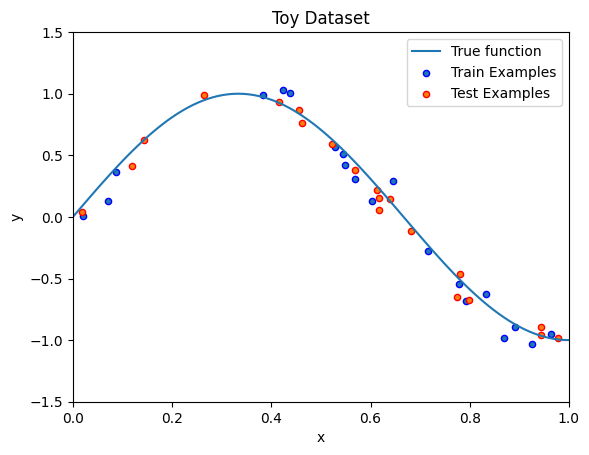

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()


Linear regression

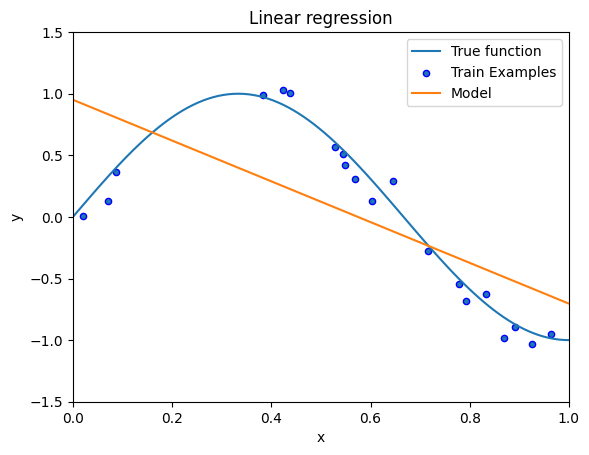

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()


Task 1: Compute the mean squared error of the learned linear model on the test set.


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = linear_regression.predict(X_test[:, np.newaxis])

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1736489094130998


Quadratic model.


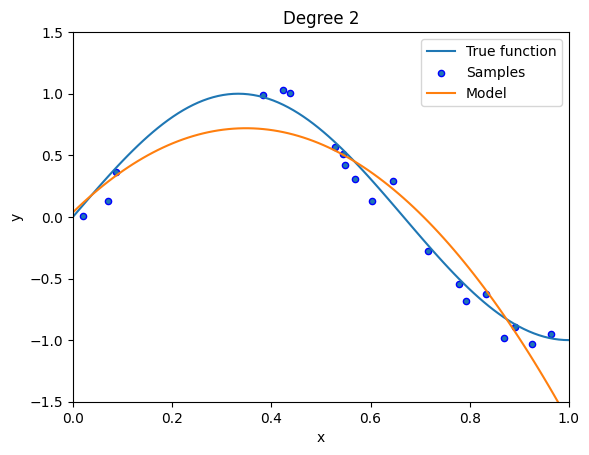

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(2, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 2")
plt.show()

Task 2: Repeat the previous part with polynomials with degree 4 and 15.


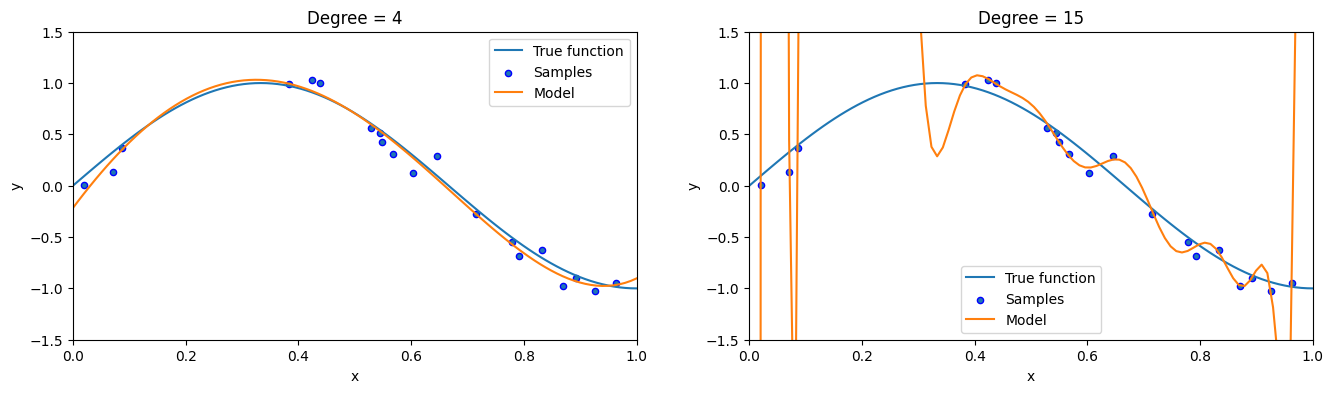

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

degrees = [4, 15]
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree, include_bias=True)
    q_model = LinearRegression()
    q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

    x = np.linspace(0, 1, 100)

    axs[i].plot(x, true_fun(x), label="True function")
    axs[i].scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
    axs[i].plot(x, q_model.predict(polynomial_features.fit_transform(x[:, np.newaxis])), label="Model")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_xlim((0, 1))
    axs[i].set_ylim((-1.5, 1.5))

    axs[i].legend(loc="best")
    axs[i].set_title("Degree = " + str(degree))

Task 3: Compute the mean squared error of the learned models on the test set. Which
model is the best?

In [ ]:
from sklearn.metrics import mean_squared_error

degrees = [2, 4, 15]

for degree in degrees:
  polynomial_features = PolynomialFeatures(degree, include_bias=True)

  q_model = LinearRegression()
  q_model.fit(polynomial_features.fit_transform(X_test[:, np.newaxis]), y_test)

  X_test_poly = polynomial_features.transform(X_test[:, np.newaxis])
  y_pred = q_model.predict(X_test_poly)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)

  print(f"Mean Squared Error on Test Set (degree " + str(degree) + "): ", mse)

Mean Squared Error on Test Set (degree 2):  0.04584642051008529
Mean Squared Error on Test Set (degree 4):  0.0037038518144928514
Mean Squared Error on Test Set (degree 15):  0.0009539349945650803


**The best model** is the one with the smallest MSE value. In our case, the model with degree 2.

1.2 Classification

Toy dataset for classification.


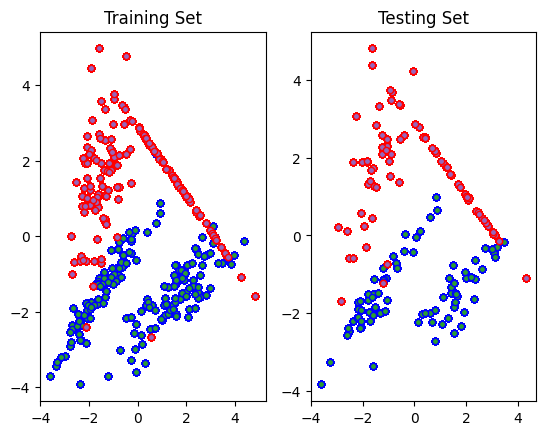

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                          n_informative=2, n_redundant=0,
                          n_clusters_per_class=2, random_state=0,
                          shuffle=True, class_sep=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")

for c in y_train:
  ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
            [X_train[i, 1] for i in np.where(y_train==c)],
            edgecolor=colors[c], s=20, label="Samples")

  ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] ,
            [X_test[i, 1] for i in np.where(y_test==c)],
            edgecolor=colors[c], s=20, label="Samples")

1.2.2 Classification with random forests


Random forest classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2,
                            criterion="entropy",
                            max_features="sqrt", max_samples=.8,
                            random_state=0)

clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))


Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


Confusion Matrix.

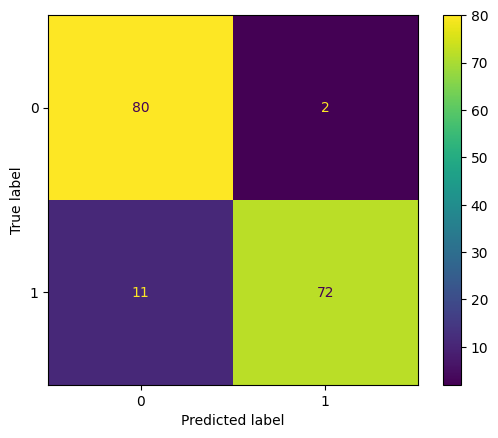

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


Task 4: In the previous example, compute the precision, recall, F1-score. Discuss
when accuracy is not the most suitable metric.


In [ ]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
print('Recall: %.3f' % recall)

score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)


Precision: 0.973
Recall: 0.867
F-Measure: 0.917


when accuracy is not the most suitable metri: When the data is skewed or highly imbalanced. When the data is imbalanced, and the model fails to detect the group with least number of samples, and succeeds in detecting the other group, we will get a high accuracy, even though, the model is not working properly.

 Train different random forests by changing the number of trees from 2 to 15. Plot the training and testing accuracy of the trained models vs the number of trees. What do you notice?

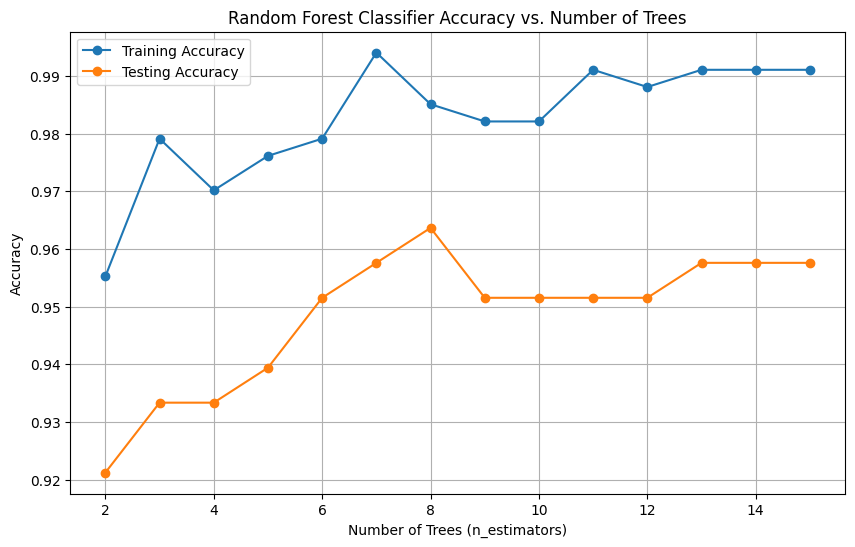

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define a range of n_estimators (number of trees)
n_estimators_values = list(range(2, 16))

# Create lists to store training and testing accuracies
training_accuracies = []
testing_accuracies = []

for n_estimators in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                criterion="entropy",
                                max_features="sqrt",
                                max_samples=0.8,
                                random_state=0)

    clf.fit(X_train, y_train)

    # Calculate training and testing accuracies
    training_accuracy = clf.score(X_train, y_train)
    testing_accuracy = clf.score(X_test, y_test)

    # Append accuracies to the respective lists
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, training_accuracies, marker='o', label='Training Accuracy')
plt.plot(n_estimators_values, testing_accuracies, marker='o', label='Testing Accuracy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

Notes: 1- As the number of trees (n_estimators) increases, the training accuracy tends to improve. This is expected because adding more trees can help the model better fit the training data.

2- The testing accuracy may initially improve with more trees, but there might be a point beyond which it stabilizes or even starts to decrease. This behavior is due to the trade-off between model complexity and overfitting. Too many trees can lead to overfitting and reduced generalization to unseen data.

3- The gap between training and testing accuracy might widen as you increase the number of trees, indicating overfitting.

**Decision Surface**

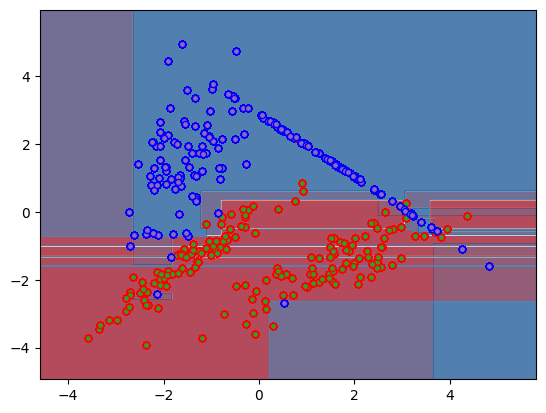

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

cmap = plt.cm.RdBu
plot_step = 0.02 # fine step width for decision surface contours
clf = RandomForestClassifier(n_estimators=2, criterion="entropy",
                            max_features="sqrt", max_samples=.8,
                            random_state=0)
clf.fit(X_train, y_train)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
                    np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

estimator_alpha = 1.0 / len(clf.estimators_)

for tree in clf.estimators_:
  Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

colors = ["r", "b"]
for c in y_train:
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
            [X_train[i, 1] for i in np.where(y_train==c)],
            edgecolor=colors[c], s=20, label="Samples")

Task 6: Draw the decision surface for a set of random forests with different number
of trees. Do you notice any pattern?

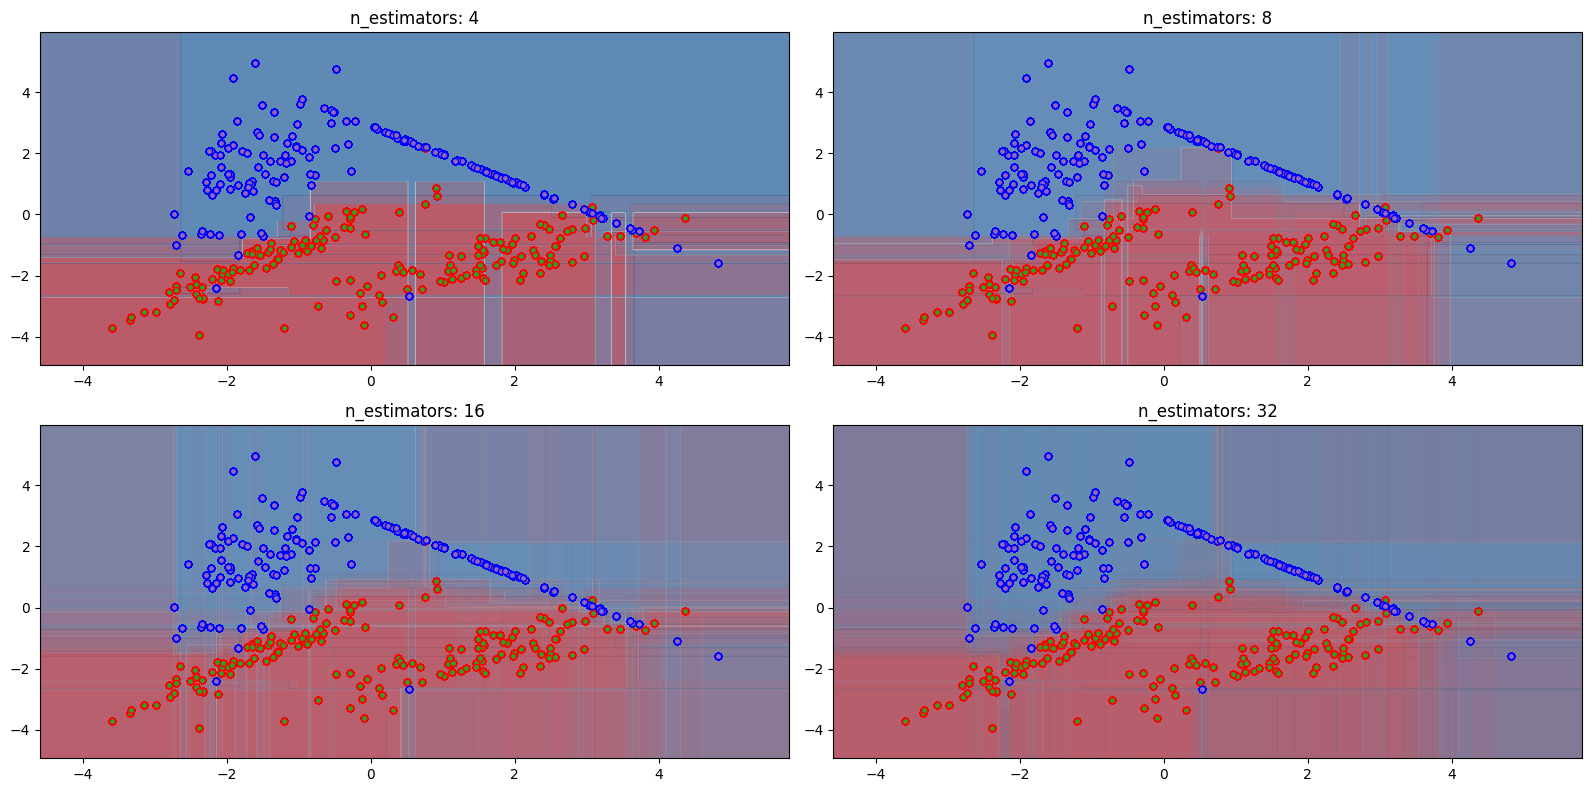

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Define n_estimators, X_train, and y_train
n_estimators = 2 ** np.arange(2, 6)

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)
cmap = plt.cm.RdBu
plot_step = 0.02

for i in range(2):
    for j in range(2):
        n_estimator = n_estimators[i * 2 + j]
        clf = RandomForestClassifier(n_estimators=n_estimator, criterion="entropy",
                                    max_features="sqrt", max_samples=0.8,
                                    random_state=0)
        clf.fit(X_train, y_train)

        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step),
            np.arange(y_min, y_max, plot_step)
        )

        estimator_alpha = 1.0 / len(clf.estimators_)

        for tree in clf.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = axs[i][j].contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        colors = ["r", "b"]
        for c in y_train:
            axs[i][j].scatter([X_train[i, 0] for i in np.where(y_train == c)],
                              [X_train[i, 1] for i in np.where(y_train == c)],
                              edgecolor=colors[c], s=20, label="Samples")

        axs[i][j].set_title("n_estimators: " + str(n_estimator))

fig.tight_layout(pad=1)
plt.show()


4.2.3 Classification with SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


Task 7: Draw the decision surface for the SVM model in the previous example.

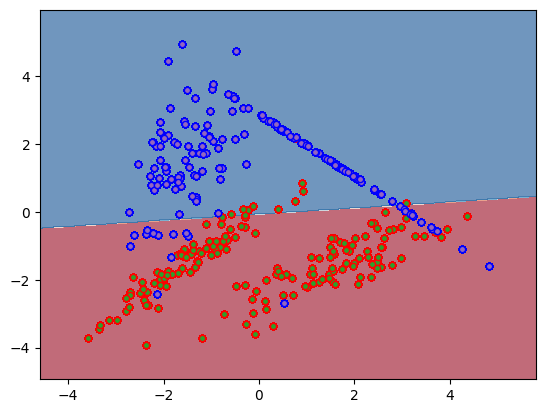

In [ ]:
cmap = plt.cm.RdBu

# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
                    np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.62, cmap=cmap)

colors = ["r", "b"]
for c in y_train:
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
            [X_train[i, 1] for i in np.where(y_train==c)],
            edgecolor=colors[c], s=20, label="Samples")

Task 8: Train an SVM model with rbf kernel and draw its decision boundary. What do you notice?

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel="rbf", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))


Training Accuracy:  0.9701492537313433
Testing Accuracy:  0.9636363636363636


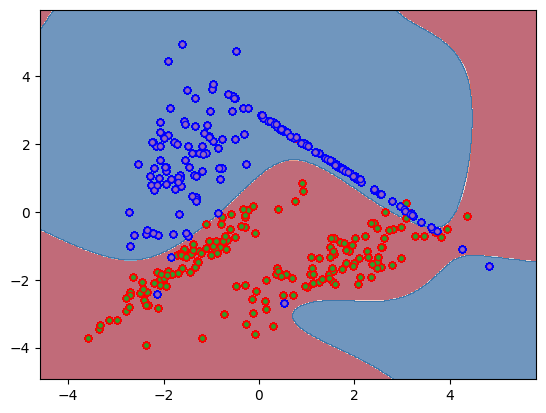

In [ ]:
cmap = plt.cm.RdBu

# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
                    np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.62, cmap=cmap)

colors = ["r", "b"]
for c in y_train:
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
            [X_train[i, 1] for i in np.where(y_train==c)],
            edgecolor=colors[c], s=20, label="Samples")


Task 9: Repeat task 8 but with C equal 0.5, 1, 100, and 1000. What do you notice?

C:  0.5
Training Accuracy:  0.9522388059701492
Testing Accuracy:  0.9575757575757575

C:  1
Training Accuracy:  0.9522388059701492
Testing Accuracy:  0.9575757575757575

C:  1000
Training Accuracy:  0.9701492537313433
Testing Accuracy:  0.9636363636363636



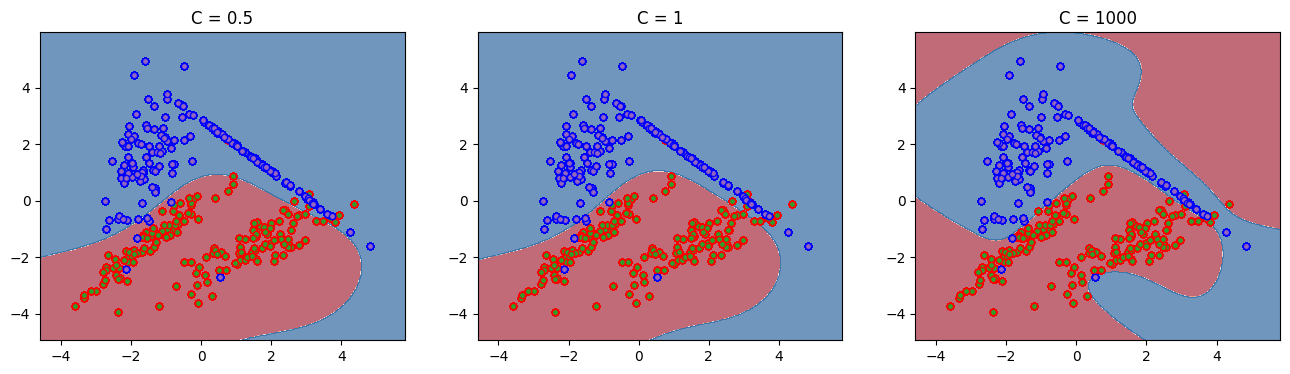

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt

C = [0.5, 1, 1000]
cmap = plt.cm.RdBu
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
plot_step = 0.02 # fine step width for decision surface contours

for i, c in enumerate(C):
    clf = svm.SVC(kernel="rbf", C=c)
    clf.fit(X_train, y_train)
    print("C: ", c)
    print("Training Accuracy: ", clf.score(X_train, y_train))
    print("Testing Accuracy: ", clf.score(X_test, y_test))
    print()

    # Create a meshgrid for plotting the decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Use axs[i] to specify the subplot
    cs = axs[i].contourf(xx, yy, Z, alpha=0.62, cmap=cmap)

    colors = ["r", "b"]
    for z in y_train:
        axs[i].scatter([X_train[j, 0] for j in np.where(y_train == z)],
                       [X_train[j, 1] for j in np.where(y_train == z)],
                       edgecolor=colors[z], s=20, label="Samples")

    axs[i].set_title("C = " + str(c))

4.3 Hyper-parameters selection

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


Task 10: GridSearchCV has an attribute called cv results , which is a dict with
keys as column headers and values as columns. Print it and try to explain the values
that you get.

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00462852, 0.00347457, 0.00675688, 0.00303092, 0.02623625,
       0.00390749]), 'std_fit_time': array([0.00183104, 0.00043846, 0.00215814, 0.00013368, 0.01126695,
       0.00046473]), 'mean_score_time': array([0.00175128, 0.00179601, 0.00180283, 0.00247598, 0.0018157 ,
       0.00158463]), 'std_score_time': array([0.00044121, 0.00014751, 0.0003031 , 0.00189978, 0.00019591,
       0.00012647]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}, {'C': 100, 'kernel': 'linear'}, {'C': 100, 'kernel': 'rbf'}], 'split0_test_score': a

'mean_fit_time' and 'std_fit_time': These arrays represent the mean and
standard deviation of the time it took to fit the model for each combination of hyperparameters.

'mean_score_time' and 'std_score_time': These arrays represent the mean and standard deviation of the time it took to score (evaluate) the model on the test data for each combination of hyperparameters.

'param_C' and 'param_kernel': These arrays show the values of the hyperparameters 'C' and 'kernel' for each combination.

'params': This is a list of dictionaries, each dictionary containing a specific combination of hyperparameters.

'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', and 'split4_test_score': These arrays represent the test scores (e.g., accuracy) of the model on different data splits for each combination of hyperparameters. Each split corresponds to a different subset of the data, allowing for a more robust evaluation.

'mean_test_score': This array contains the mean test scores across all data splits for each combination of hyperparameters. It provides an overall measure of the model's performance.

'std_test_score': This array contains the standard deviation of the test scores across all data splits for each combination of hyperparameters. It indicates the variability in model performance.

'rank_test_score': This array shows the ranking of each combination of hyperparameters based on the mean test score. Lower ranks indicate better-performing models.